# GALAXIES AND QUASARS
We wanto to build a classifier tha distinguish between galaxies and quasars given the intensities of the different colours of the signal. First, we do some scatter plot to vizualize the data. To classify, we won't use the colors themselves, but the differences between near colours.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from astroML.classification import GMMBayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [2]:
full = np.loadtxt("../solutions/galaxyquasar.csv", dtype = str, delimiter=',')
full_data = np.delete(full, [0], axis=0)
names = np.delete(full, range(1, len(full[:, 0])), axis=0)
print(names)

[['u' 'g' 'r' 'i' 'z' 'class' 'z1' 'zerr']]


In [3]:
colors = np.zeros((len(full_data[:, 0]), 4))
labels = np.array([])
for i in range(len(full_data[:, 0])):
    colors[i] = np.array([float(full_data[i, 0]) - float(full_data[i, 1]), float(full_data[i, 1]) - float(full_data[i, 2]), \
                          float(full_data[i, 2]) - float(full_data[i, 3]), float(full_data[i, 3]) - float(full_data[i, 4])])
    if full_data[i, 5] == "GALAXY":
        labels = np.append(labels, 0)
    else:
        labels = np.append(labels, 1)

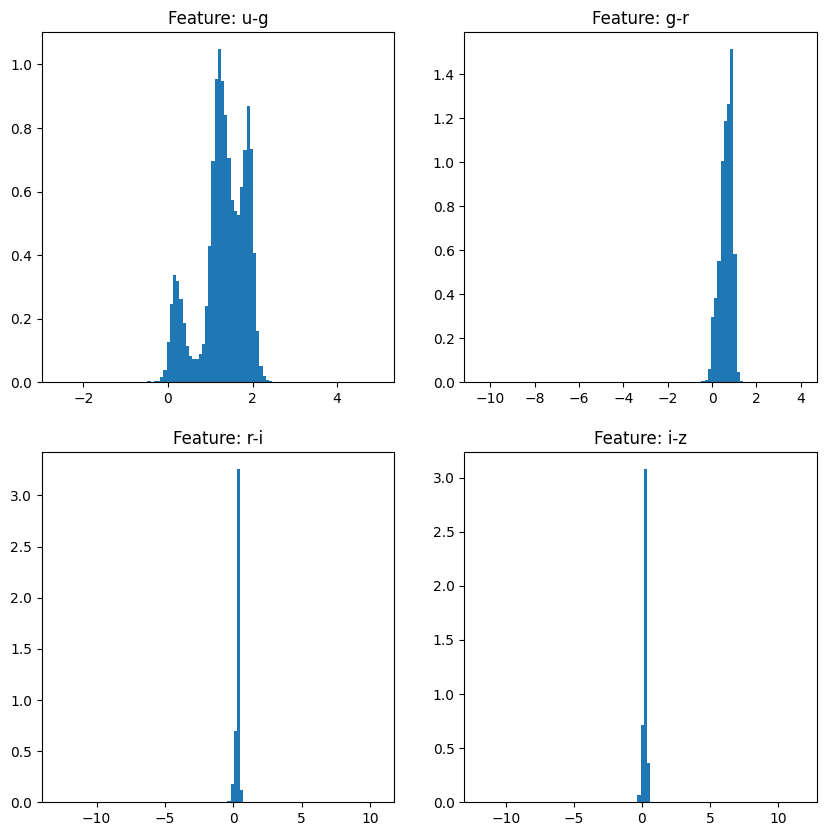

In [4]:
plt.figure(figsize=(10, 10))
title = [r"u-g", r"g-r", r"r-i", r"i-z"]
for i in range(0, 4):
    plt.subplot(2,2,i+1)
    plt.hist(colors[:, i], bins = 100, density=True)
    plt.title("Feature: " + title[i])

The first feature seems to contain the information about the population.

Now we build some classifiers using different methods:
1) Gaussian Naive Bayes;
2) Linear Discriminant Analysis;
3) Quadratic Discriminant Analysis;
4) Gaussian Mixture Model classifier for different numbers of components;
5) K-nearest neighbors classifier for different numbers of neighbors.
We compare them plotting the ROC curve.

We begin with the first three:

Text(0.5, 1.0, 'ROC curves for some classifiers')

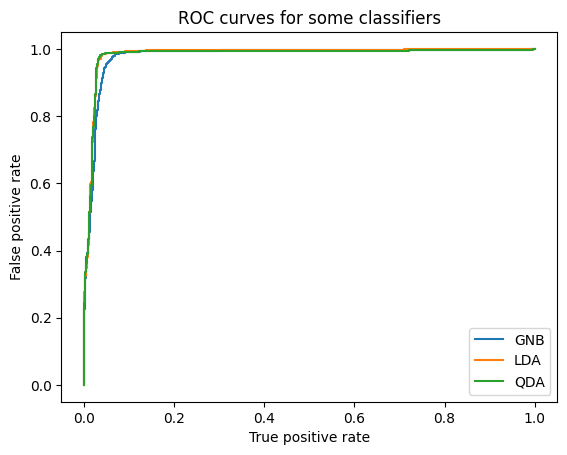

In [5]:
c_train, c_test, l_train, l_test = train_test_split(colors, labels, train_size = 0.8, shuffle=False)
classifiers = [GaussianNB(), LDA(), QDA()]
cl_names = ["GNB", "LDA", "QDA"]
for i in range(len(classifiers)):
    classifiers[i].fit(c_train, l_train)
    l_probs = classifiers[i].predict_proba(c_test)[:, 0]

    fps_cl, tps_cl, _ = roc_curve(l_test[:, np.newaxis], l_probs)
    plt.plot(tps_cl, fps_cl, label=cl_names[i])

plt.legend()
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.title("ROC curves for some classifiers")

Then wit the GMM Classifier:

Text(0.5, 1.0, 'ROC curves for GMM classifier with different componennts')

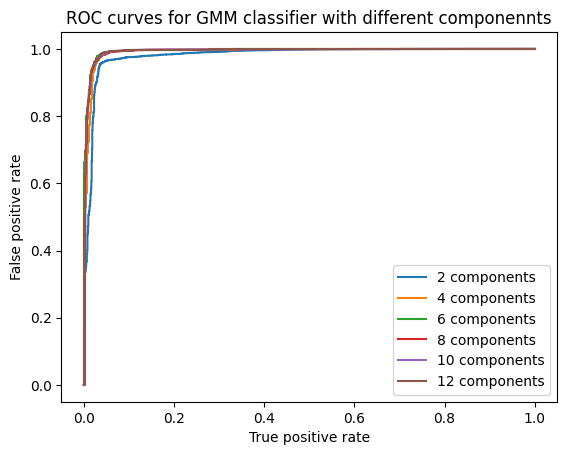

In [6]:
c_train, c_test, l_train, l_test = train_test_split(colors, labels, train_size = 0.8, shuffle=False)

for i in range(2, 13, 2):
    classifier = GMMBayes(i)
    classifier.fit(c_train, l_train)
    l_probs = classifier.predict_proba(c_test)[:, 0]
    fps_cl, tps_cl, _ = roc_curve(l_test[:, np.newaxis], l_probs)
    plt.plot(tps_cl, fps_cl, label="{} components".format(i))

plt.legend()
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.title("ROC curves for GMM classifier with different componennts")

And in the end with the K-nearest neighbours classifier:

Text(0.5, 1.0, 'ROC curves for K-nearest neighbor classifier')

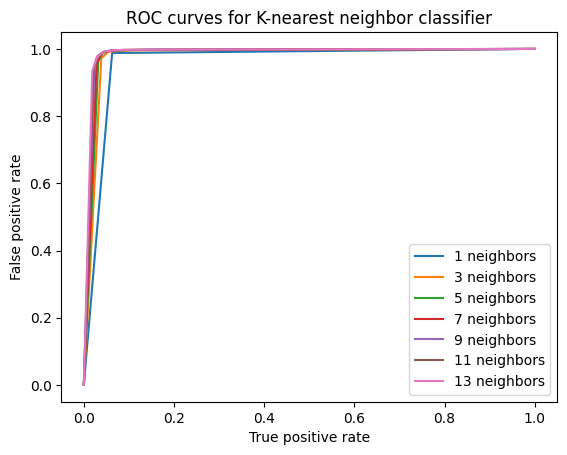

In [7]:
c_train, c_test, l_train, l_test = train_test_split(colors, labels, train_size = 0.8, shuffle=False)

for i in range(1, 15, 2):
    classifier = KNeighborsClassifier(i)
    classifier.fit(c_train, l_train)
    l_probs = classifier.predict_proba(c_test)[:, 0]
    fps_cl, tps_cl, _ = roc_curve(l_test[:, np.newaxis], l_probs)
    plt.plot(tps_cl, fps_cl, label="{} neighbors".format(i))

plt.legend()
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.title("ROC curves for K-nearest neighbor classifier")

All of them, with sufficiently high hyperparameters, seems to perform similarly